In [19]:
# for some basic operations
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


In [20]:
import pandas as pd

# Load dataset into dataframe
df = pd.read_csv('fruits.csv')
df = df.rename(columns={'43.7': 'DIAMETRE', '38.57': 'POIDS'})
df



,DIAMETRE,POIDS
0,22.47,6.41
1,26.09,8.72
2,36.18,27.45
3,18.24,1.89
4,43.80,43.59
...,...,...
394,41.16,41.34
395,58.76,94.25
396,26.91,9.60
397,20.36,5.50


In [21]:
df.describe()

,DIAMETRE,POIDS
count,399.000000,399.000000
mean,35.147293,32.675138
std,12.765921,31.120800
min,17.030000,1.090000
25%,24.110000,7.160000
50%,28.930000,11.430000
75%,46.555000,53.250000
max,58.920000,109.910000


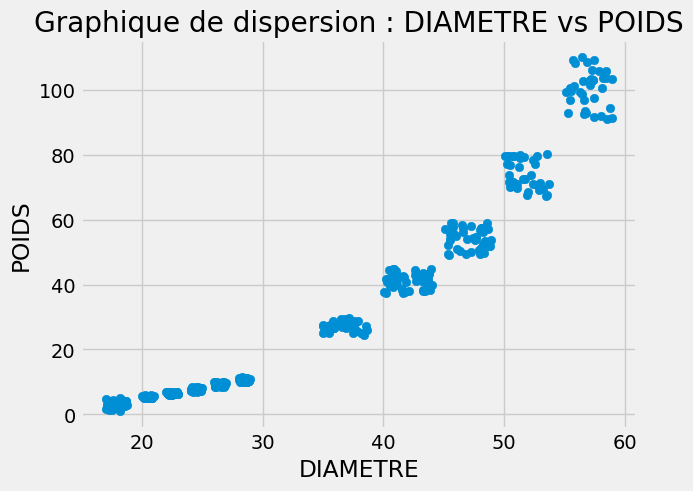

In [22]:
plt.scatter(df["DIAMETRE"], df["POIDS"])
plt.xlabel("DIAMETRE")
plt.ylabel("POIDS")
plt.title("Graphique de dispersion : DIAMETRE vs POIDS")
plt.show()

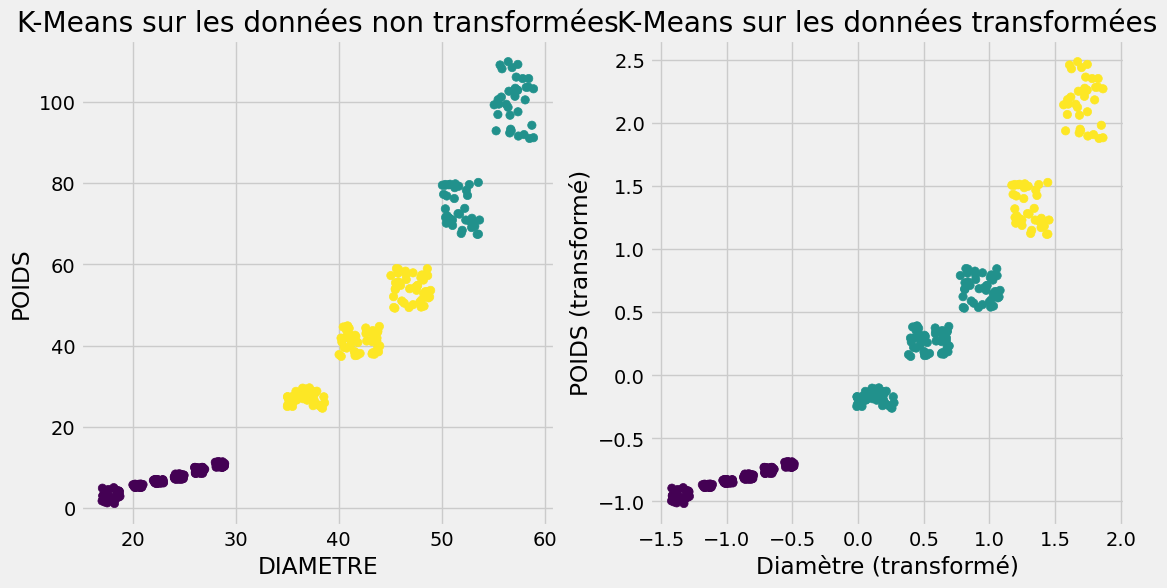

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Choisir le nombre de clusters
n_clusters = 3

# Appliquer K-Means sur les données non transformées
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster_non_transforme'] = kmeans.fit_predict(df)

# Transformer les données avec StandardScaler
scaler = StandardScaler()
df_transformed = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Appliquer K-Means sur les données transformées
kmeans_transformed = KMeans(n_clusters=n_clusters, random_state=42)
df_transformed['cluster_transforme'] = kmeans_transformed.fit_predict(df_transformed)

# Visualiser les résultats
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(df["DIAMETRE"], df["POIDS"], c=df['cluster_non_transforme'], cmap='viridis')
axes[0].set_xlabel("DIAMETRE")
axes[0].set_ylabel("POIDS")
axes[0].set_title("K-Means sur les données non transformées")

axes[1].scatter(df_transformed["DIAMETRE"], df_transformed["POIDS"], c=df_transformed['cluster_transforme'], cmap='viridis')
axes[1].set_xlabel("Diamètre (transformé)")
axes[1].set_ylabel("POIDS (transformé)")
axes[1].set_title("K-Means sur les données transformées")

plt.show()


c:\Users\SurfaceBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\SurfaceBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


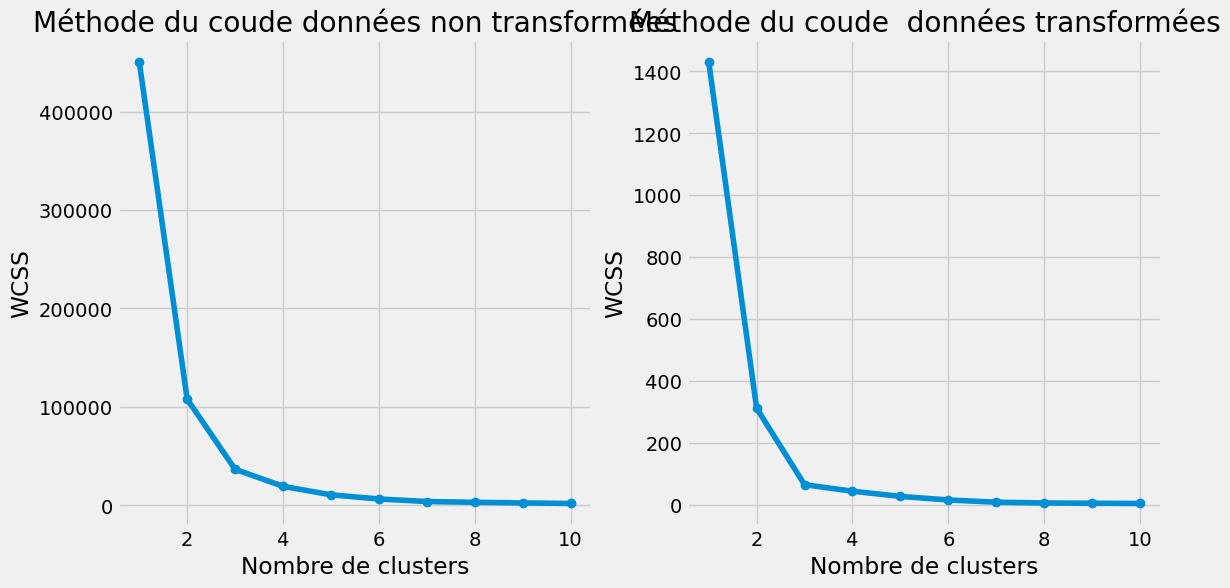

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Fonction pour calculer la somme des distances au carré pour un certain nombre de clusters
def calculate_wcss(data, max_clusters):
    wcss = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculer la somme des distances au carré pour les deux modèles
max_clusters = 10
wcss_non_transformed = calculate_wcss(df, max_clusters)
wcss_transformed = calculate_wcss(df_transformed, max_clusters)

# Visualiser les résultats avec la méthode du coude
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(range(1, max_clusters + 1), wcss_non_transformed, marker='o')
axes[0].set_xlabel("Nombre de clusters")
axes[0].set_ylabel("WCSS")
axes[0].set_title("Méthode du coude données non transformées")

axes[1].plot(range(1, max_clusters + 1), wcss_transformed, marker='o')
axes[1].set_xlabel("Nombre de clusters")
axes[1].set_ylabel("WCSS")
axes[1].set_title("Méthode du coude  données transformées")

plt.show()


# Modèle de ML

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le
le.fit(data_2021["Healthy life expectancy"])
le.classes_


array([48.478, 48.7  , 50.102, 50.114, 50.833, 51.651, 51.969, 52.493,
       53.4  , 53.515, 53.78 , 54.151, 54.706, 54.713, 54.914, 55.008,
       55.16 , 55.7  , 55.809, 56.101, 56.201, 56.498, 56.799, 56.904,
       57.122, 57.161, 57.349, 57.586, 57.948, 57.999, 58.221, 58.709,
       58.968, 59.   , 59.269, 59.302, 59.305, 59.802, 59.962, 60.583,
       60.633, 60.704, 61.4  , 61.998, 62.   , 62.236, 62.25 , 62.3  ,
       62.409, 62.5  , 63.813, 63.901, 64.233, 64.281, 64.3  , 64.401,
       64.703, 64.8  , 64.902, 64.958, 65.2  , 65.255, 65.474, 65.656,
       65.699, 65.9  , 66.005, 66.102, 66.208, 66.253, 66.3  , 66.402,
       66.601, 66.603, 66.7  , 66.701, 66.9  , 67.   , 67.055, 67.1  ,
       67.102, 67.199, 67.201, 67.299, 67.3  , 67.333, 67.355, 67.401,
       67.5  , 67.657, 67.906, 68.   , 68.001, 68.034, 68.098, 68.2  ,
       68.25 , 68.597, 68.6  , 68.699, 68.8  , 68.999, 69.   , 69.1  ,
       69.201, 69.495, 69.593, 69.6  , 69.652, 69.702, 70.   , 70.6  ,
      

In [ ]:
data_2021["Healthy life expectancy"].value_counts()

72.600    3
71.400    2
62.000    2
72.700    2
73.800    2
         ..
68.000    1
68.001    1
67.100    1
66.701    1
52.493    1
Name: Healthy life expectancy, Length: 135, dtype: int64

Répartition de survived (**pop générale**) 

# Construction de l'arbre 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [ ]:
# 1è bug rencontré : could not convert string to float
# tree.fit(upperwhisker, Generosity)

NameError: name 'upperwhisker' is not defined

In [ ]:
# tree.classes_
# print(tree.max_depth)
# tree.criterion

y_pred = tree.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [ ]:
y_test.values

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [ ]:
# from sklearn.metrics import confusion_matrix
# mat_conf = confusion_matrix(y_test, y_pred)
# mat_conf
acc = mat_conf.diagonal().sum()/mat_conf.sum()
acc

0.7309417040358744

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc
# score = tree.score(X_test, y_test)
# score

0.7309417040358744

In [ ]:
from sklearn.tree import plot_tree

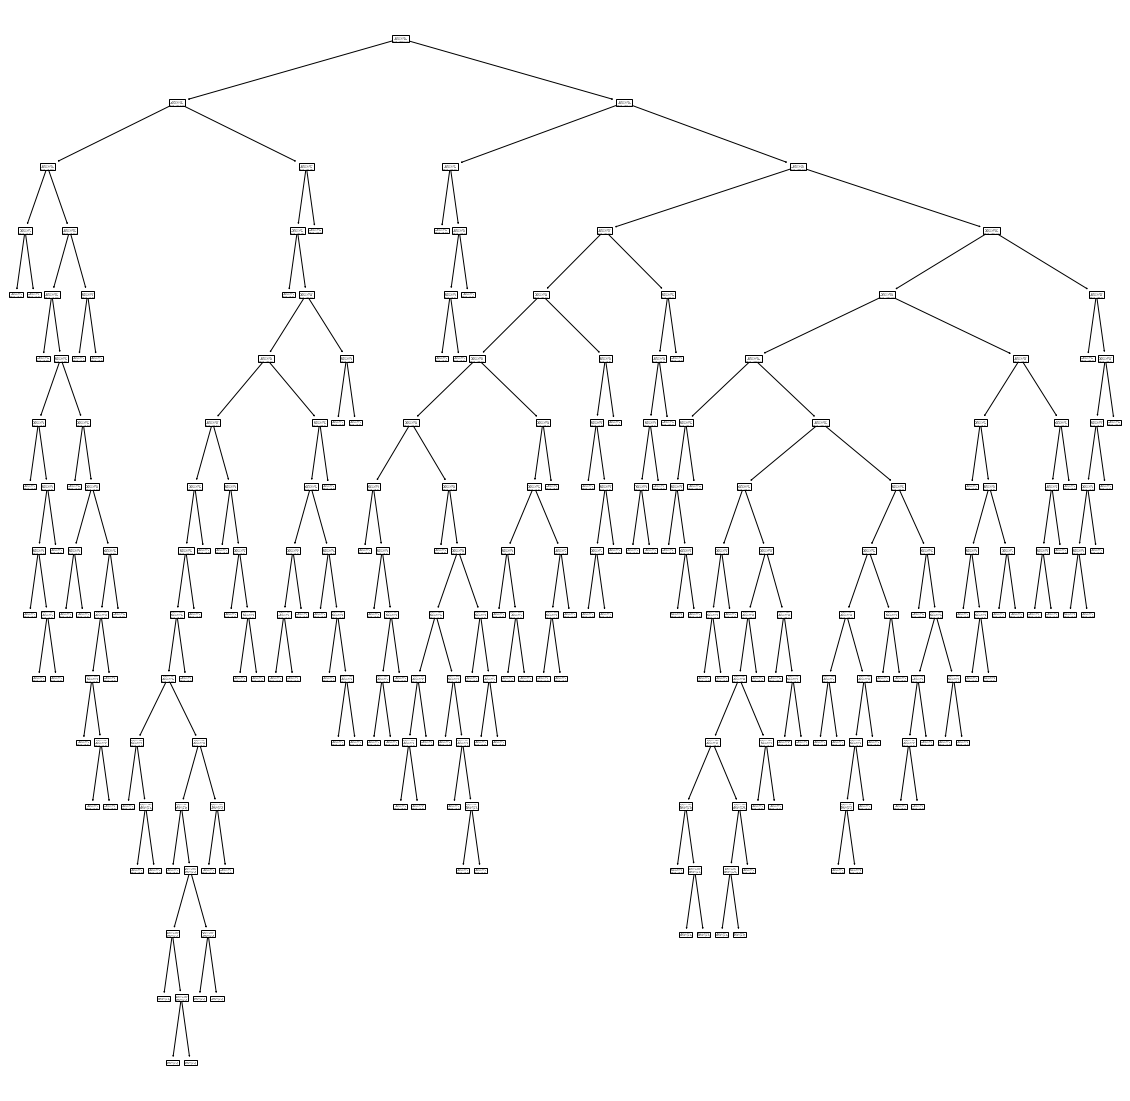

In [ ]:
plt.figure(figsize = (20, 20))
tree_titanic = plot_tree(tree)
# L'arbre est trop grand (illisible) => Overfittng

In [ ]:
from sklearn.tree import export_text
# tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
# print(tree_rules)

# Q : Cmnt extraire les régles à partir d'un arbre sous la forme d'un DataFrame :
# R :
# https://stackoverflow.com/questions/56334210/how-to-extract-sklearn-decision-tree-rules-to-pandas-boolean-conditions

In [ ]:
# A l'aide d'un gridsearch => plusieurs params à la fois

from sklearn.model_selection import GridSearchCV
param = [{"max_depth" : list(range(2, 10))}]
grid =  GridSearchCV(DecisionTreeClassifier(), param, cv = 10, n_jobs = -1)
grid = grid.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - grid.best_score_, treeOpt.best_params_))


In [ ]:
X_train.head(2)

,pclass,sex,age,sibsp,parch
512,1,1,32.5,1,0
619,2,1,18.0,0,0


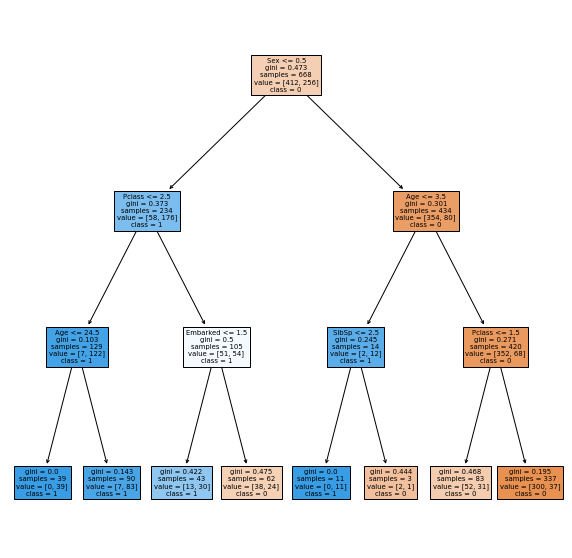

In [ ]:
# Algo optimal pr les besoins du plot de l'arbre
tree=DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize = (10, 10))
tree_titanic = plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'] )